In [26]:
import os
import shutil
from pathlib import Path
import gdown
from ultralytics import YOLO
import yaml
import random
import cv2
import matplotlib.pyplot as plt

In [27]:
# model_path = './saved_model/rice-germ-cls-model.onnx'
model_path = './models/rice-germ-cls-model.onnx'
model = YOLO(model_path, task='classify')

In [28]:
full_path = os.path.abspath("./rice-germ-cls-dataset")

yaml_data = dict(
    path = full_path,
    train='',
    val='val/',
    nc=3,
    names=['Good', 'Moderate', 'Bad']
)

with open("rice-germ-cls-dataset/data.yaml", "w") as f:
    yaml.dump(yaml_data, f, default_flow_style=False, sort_keys=False)

In [29]:
model.val(data = "./rice-germ-cls-dataset/data.yaml", imgsz=128, device="0", save=True, conf=0.5)

Ultralytics YOLOv8.1.38 🚀 Python-3.11.7 torch-2.2.1 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
Loading models\rice-germ-cls-model.onnx for ONNX Runtime inference...
Forcing batch=1 square inference (1,3,128,128) for non-PyTorch models


val: Scanning C:\Users\chant\Desktop\CV_Project\ComputerVision_STA_Project\rice-germ-cls-dataset\val... 210 images, 0 corrupt: 100%|██████████| 210/210 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 210/210 [00:06<00:00, 32.59it/s] 


                   all      0.986          1
Speed: 0.2ms preprocess, 9.1ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs\classify\val10


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000002510F06DC10>
curves: []
curves_results: []
fitness: 0.9928571581840515
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.985714316368103, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9928571581840515}
save_dir: WindowsPath('runs/classify/val10')
speed: {'preprocess': 0.2002670651390439, 'inference': 9.095969654264906, 'loss': 0.023800986153738837, 'postprocess': 0.013642084030877976}
task: 'classify'
top1: 0.985714316368103
top5: 1.0

In [30]:
def draw_result(result):
    probs = result[0].probs.data.cpu().numpy() # probs.data = [Bad, Good, Moderate]
    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.cvtColor(result[0].orig_img, cv2.COLOR_BGR2RGB))
    plt.text(5, 10, f"Good: {probs[1]:.2f}", color='white', fontsize=10, backgroundcolor='blue')
    plt.text(5, 30, f"Moderate: {probs[2]:.2f}", color='white', fontsize=10, backgroundcolor='blue')
    plt.text(5, 50, f"Bad: {probs[0]:.2f}", color='white', fontsize=10, backgroundcolor='blue')
    plt.title("Predicted of \"{}\"".format(os.path.basename(result[0].path)))
    plt.axis('off')
    plt.show()


image 1/1 c:\Users\chant\Desktop\CV_Project\ComputerVision_STA_Project\rice-image-dataset-for-rice-germ-detection\Rice_Image_Dataset_OD\Jasmine\Jasmine (9653).jpg: 128x128 Bad 0.99, Moderate 0.01, Good 0.00, 69.0ms
Speed: 2.0ms preprocess, 69.0ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)


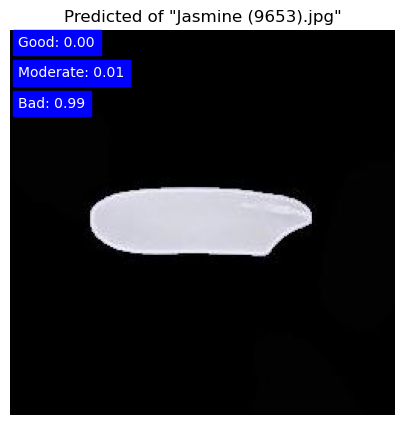

In [34]:
# randomly pick an image from the raw dataset
raw_dataset_path = "./rice-image-dataset-for-rice-germ-detection/Rice_Image_Dataset_OD/Jasmine"
raw_dataset = os.listdir(raw_dataset_path)
raw_img_dataset = [img for img in raw_dataset if img.endswith(".jpg")]
raw_img_dataset = [os.path.join(raw_dataset_path, img) for img in raw_img_dataset]

picked_img = random.choice(raw_img_dataset[-1000:])
result = model.predict(picked_img, imgsz=128, conf=0.5, device="0")

draw_result(result)

# Rice Germ Quality Baseline
![baseline](rice-germ-quality-baseline.png)